# Tutorial 4

### Given three functions:

$$\begin{aligned}f_1\left(t\right)&=2\sin\left(2\pi t\right)\\ f_2\left(t\right)&=2\cos\left(2\pi t\right)\\ f_3\left(t\right)&=2\sin\left(2\pi t\right)\end{aligned}$$

Taking $f\left(t\right)=f_1\left(t\right)+f_2\left(t\right)+f_3\left(t\right)$, perform DFT and its inverse.


First we import the libraries:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

plt.rcParams['figure.figsize'] = [16, 10]  # Set figure size
plt.rcParams.update({'font.size': 16, 'axes.grid': True})  # Set font size and enable grid

We now plot the graph:
$$\begin{aligned}f\left(t\right)&=f_1\left(t\right)+f_2\left(t\right)+f_3\left(t\right)
\\
&=4\sin\left(2\pi t\right)+ 2\cos\left(2\pi t\right)
\end{aligned}$$

A little maths explanation here:

for the sum of two functions of periods $nx$ and $mx$, with $n, m\in \N$, its period is $\text{lcm}\left(n, m\right)x$.


If you noticed, the form of $A\sin\left(2\pi n t\right)$ has period of $\frac 1 n$. We're going to use integers here, so the sum of the periodic functions will always cycle within $1\text{s}$.

Of course, for exploration, you may adjust the integers after the input $t$, say, to $31$ or something. If you are going to put in non-integers, do note to change the limit of $x$-axis.

In [9]:
# Constructing the signal
def f1(t):
    return 2 * np.sin(2 * np.pi * t * 2)

def f2(t):
    return 2 * np.cos(2 * np.pi * t * 2)

def f3(t):
    return 2 * np.sin(2 * np.pi * t * 2)

def f(t):
    return f1(t) + f2(t) + f3(t)

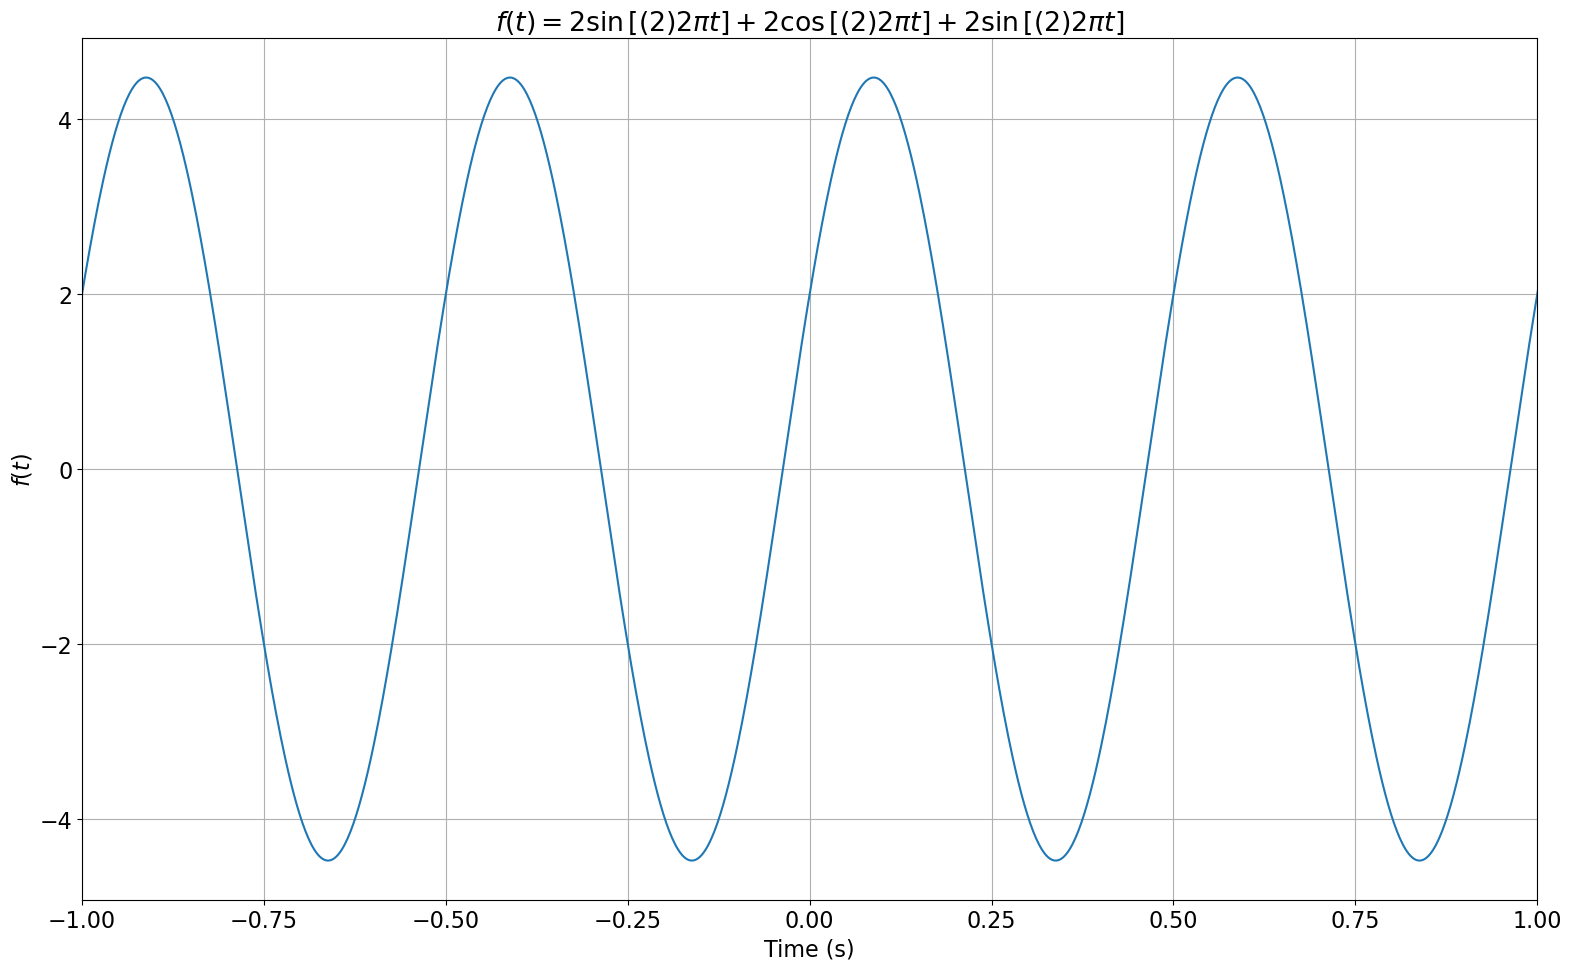

In [10]:
a = -100  # Start of interval
b = 100  # End of interval

x = np.linspace(a, b, 100000)
y = f(x)

# Plotting the signal
plt.plot(x, y)
plt.title(fr'$f(t) = 2\sin\left[\left(2\right)2πt\right] + 2\cos\left[\left(2\right)2πt\right] + 2\sin\left[\left(2\right)2πt\right]$')
plt.xlabel('Time (s)')
plt.xlim(-1, 1)
plt.ylabel('$f(t)$')
plt.tight_layout()
plt.show()

Now we perform a Discrete Fourier Transform on the function, using the built-in Fast Fourier Transform pack (fftpack):

In [11]:
# Setting up the Fourier Transform
n = 1000000  # Number of sample points

dt = (b - a) / n  # Spacing between sample points

t = np.linspace(a, b, n + 1)
f_t = f(t)

In [12]:
dft_t = fft(f_t)  # Discrete Fourier Transform
dft_x = np.linspace(0, 1 / dt, n + 1)

# print('DFT of f(t):')
# for i, dft in enumerate(dft_t):  # Print DFT
#     # print(f'Point {i}: x = {dft_x[i]:.6f}, {dft}')
#     print(f'Point {i}: x = {dft_x[i]:.6f}, {abs(dft)}')

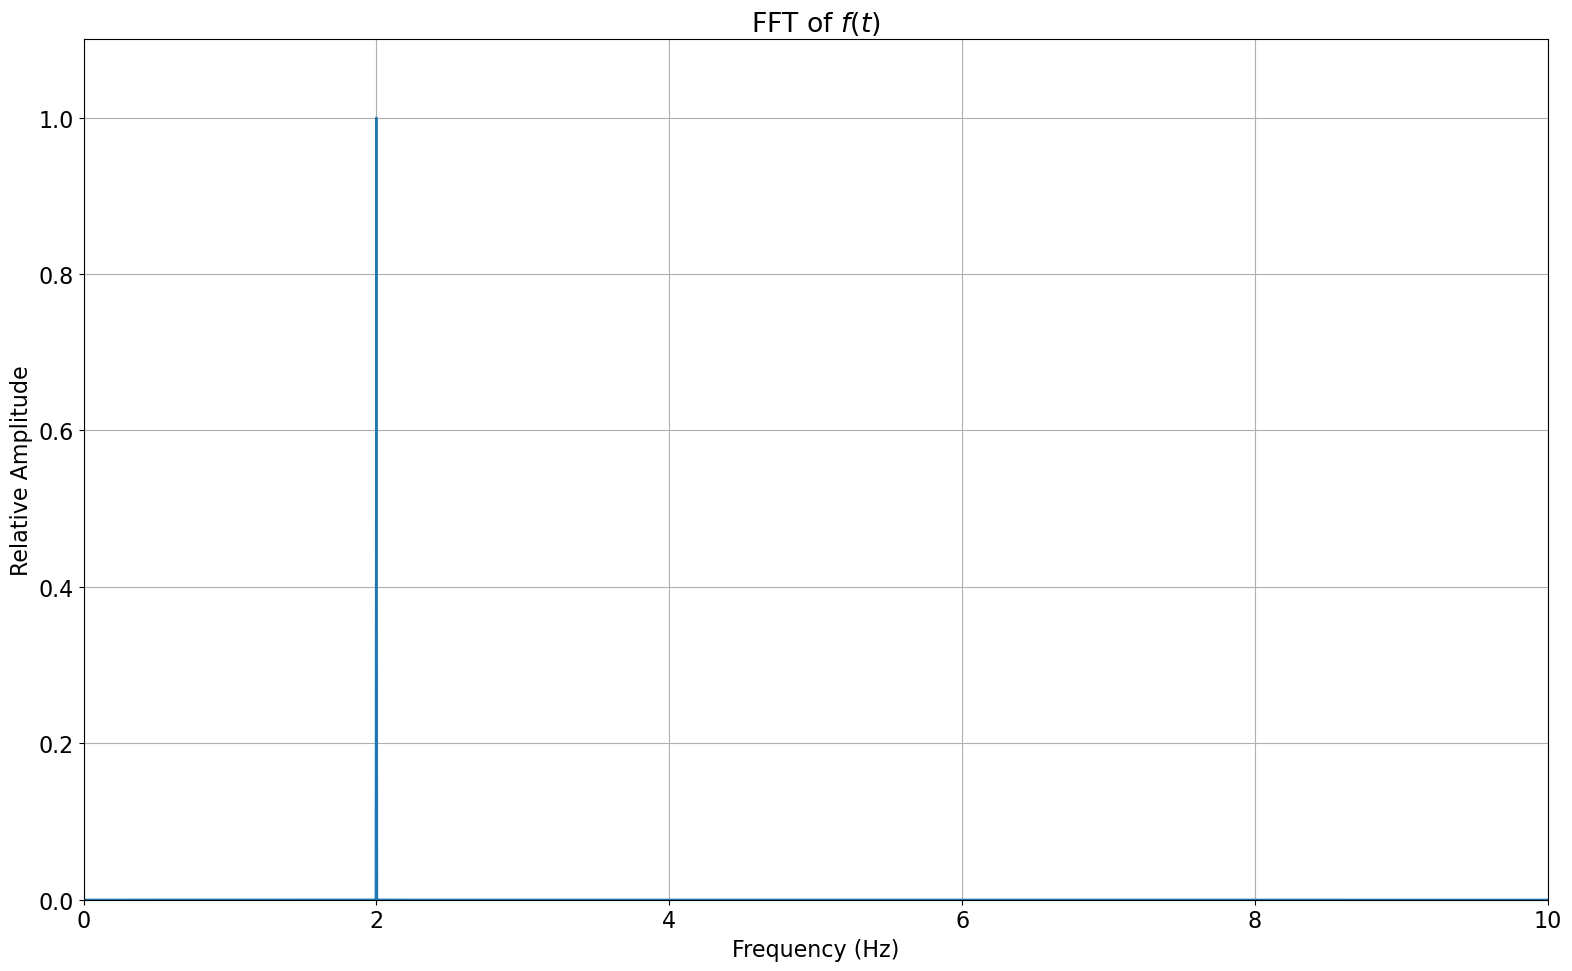

In [13]:
# Plot DFT
plt.plot(dft_x, abs(dft_t) / np.max(abs(dft_t)))
plt.title('FFT of $f(t)$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Relative Amplitude')
plt.xlim(0, 10)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

The FFT of the signal shows a peak at $1\ \text{Hz}$, which is the only frequency that is present in our signal. This is due to the sine and cosine graph having the same frequency, just different in the presence of a phase difference. You may change the frequency, and note their relative amplitude and peaks at other values. However, do note that you might need to adjust the limit of the $x$-axis, to properly see the peaks.

Now we perform the inverse FFT:

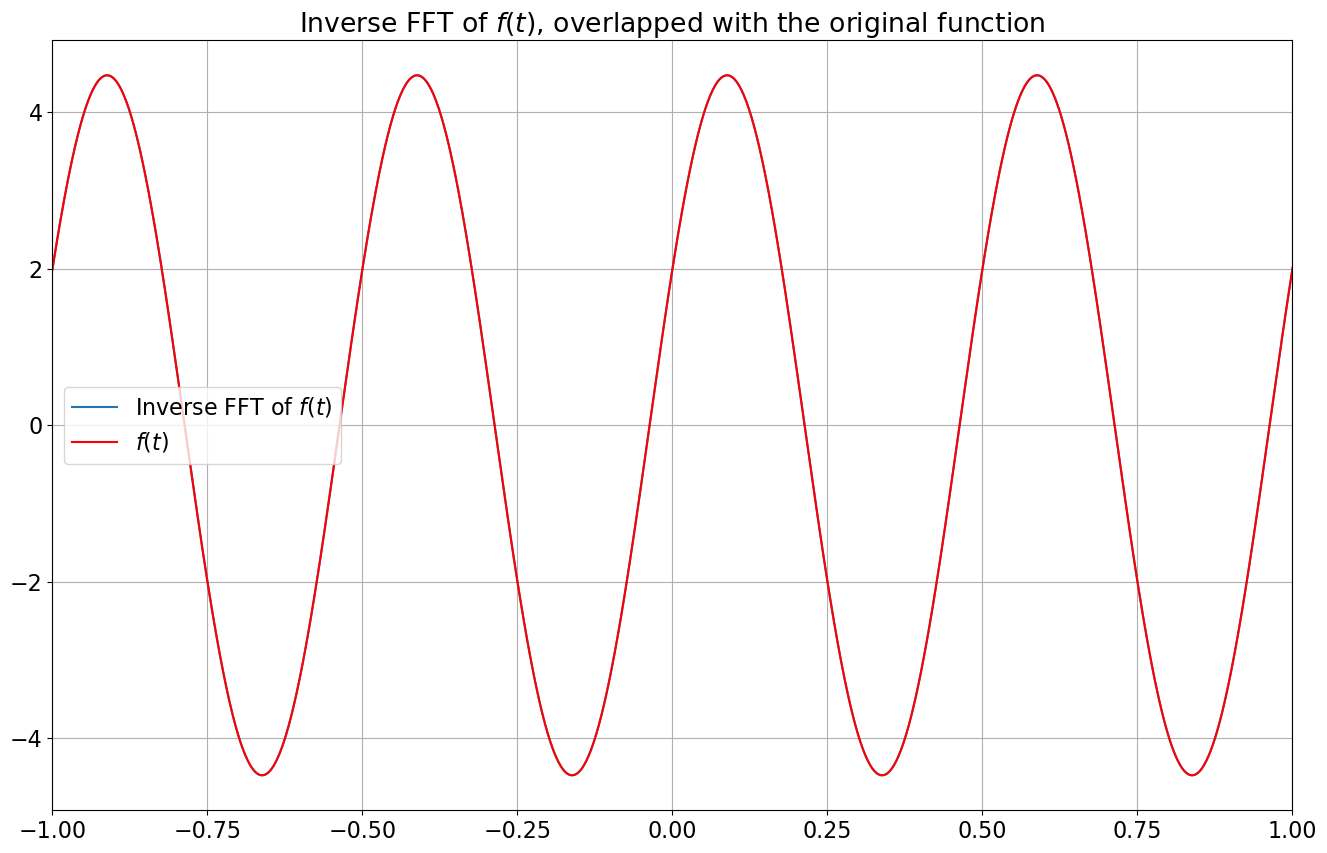

In [14]:
# Inverse FFT, and plotting
inverse_fft = ifft((dft_t))
plt.plot(t, inverse_fft, label='Inverse FFT of $f(t)$')
plt.xlim(a, b)

# Plotting the original function
x = np.linspace(a, b, 100000)
y = f(x)

# Overlap the original function
plt.plot(x, y, color='red', label='$f(t)$')
plt.title('Inverse FFT of $f(t)$, overlapped with the original function')
plt.xlim(-1, 1)
plt.legend()
plt.show()

As shown above, the inverse FFT and the original function overlaps perfectly. This is due to our use of large number of points. If we decrease the number of points, you would see the two functions not overlapping perfectly. You may try, say, 50 intervals.

Another thing is, you can adjust the values of $a$ and $b$, and observe the resolution of the Fourier transform. Larger interval widths correspond to higher resolution in the Fourier space. This is due time-frequency duality in Fourier analysis. The width of the peak is related to the length of the signal by:
$$\begin{aligned}\text{width}\propto \frac 1 T\end{aligned}$$

So increasing $T$ results in narrower peaks in the frequency spectrum.